# Market Basket Analyis of a Grocery Store
Analyzing a grocery store's transactions and generating association trends to gain insights which will be used in business decision-making.

# Importing Libraries 
Importing Standard Libraries such as pandas, numpy with core library mlxtend which enables the usage of apriori and association rules, these two will helping us generate association.

In [11]:
import micropip
await micropip.install(['mlxtend','seaborn'])
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori,association_rules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:114: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):
/lib/python3.12/site-packages/pyodide_kernel/kernel.py:115: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  await self.interpreter.run_cell_async(code, store_history=True)


# Dataset Creation
Created the dataset using the csv file which was imported locally from the device (This can be replaced with the link).

In [2]:
df=pd.read_csv("Groceries_dataset.csv")
print(df.head())
df.shape

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:114: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


(38765, 3)

# Checking For Null Values
No null values were found. Hence, This dataset is ready for further steps.

In [3]:
df.isnull().sum()

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:114: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


Member_number      0
Date               0
itemDescription    0
dtype: int64

# Preparations before creating items and rules
Grouping by members and date will help us create the basket of a specific member on a specific date.

In [4]:
basket = (df.groupby(['Member_number', 'Date'])['itemDescription']
           .apply(list)
           .reset_index(name='items'))

print(basket.head())

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:114: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


   Member_number        Date  \
0           1000  15-03-2015   
1           1000  24-06-2014   
2           1000  24-07-2015   
3           1000  25-11-2015   
4           1000  27-05-2015   

                                               items  
0  [sausage, whole milk, semi-finished bread, yog...  
1                  [whole milk, pastry, salty snack]  
2                     [canned beer, misc. beverages]  
3                        [sausage, hygiene articles]  
4                         [soda, pickled vegetables]  


# Data Transformation
Encoding values so that they can used for the analysis.Unlike other data science problems, market basket analysis requires the use of TransactionEncoder.

In [5]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket['items']).transform(basket['items'])
basket_df = pd.DataFrame(te_ary, columns=te.columns_)
basket_df.head()

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:114: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Creating frequent itemset
Using apriori to check and create frequent itemset. It checks for the occurance of a item in a basket with a criteria called minimum support which is kept depending on the dataset.

frequent_items = apriori(basket_df, min_support=0.002, use_colnames=True)
print(frequent_items.sort_values('support', ascending=False).head(10))
print(frequent_items.shape)

# Checking for amount of items in a set
Doing this will help us set the value of the metric while generating associaton rules.

In [7]:
frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))
frequent_items['length'].value_counts()

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:114: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


length
2    204
1    126
Name: count, dtype: int64

# Generating Association Rules 
Using the association_rules to create the association rules which will reveal the insights. Here, confidence is the metric and threshold is kept less as there are not more than 2 items in a set.

In [8]:
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
print(rules.shape)
rules.sort_values('lift', ascending=False).head(10)


/lib/python3.12/site-packages/pyodide_kernel/kernel.py:114: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


(61, 14)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
23,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,1.0,5.355097e-04,1.016420,0.108146,0.033261,0.016154,0.089214
14,(chocolate),(rolls/buns),0.023592,0.110005,0.002807,0.118980,1.081592,1.0,2.117455e-04,1.010188,0.077260,0.021461,0.010085,0.072248
25,(frozen meals),(other vegetables),0.016775,0.122101,0.002139,0.127490,1.044134,1.0,9.039652e-05,1.006176,0.042990,0.015640,0.006138,0.072503
35,(meat),(other vegetables),0.016842,0.122101,0.002139,0.126984,1.039991,1.0,8.223631e-05,1.005593,0.039112,0.015633,0.005562,0.072250
30,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,1.0,3.821049e-05,1.002659,0.014188,0.015904,0.002652,0.088754
3,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,1.0,1.303311e-05,1.000682,0.004984,0.018930,0.000681,0.072297
28,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,1.0,5.091755e-07,1.000017,0.000141,0.026679,0.000017,0.072021
6,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,1.0,-4.792503e-06,0.999874,-0.000702,0.036469,-0.000126,0.101549
42,(salty snack),(other vegetables),0.018780,0.122101,0.002205,0.117438,0.961807,1.0,-8.757819e-05,0.994716,-0.038896,0.015904,-0.005312,0.067750
10,(candy),(whole milk),0.014369,0.157923,0.002139,0.148837,0.942468,1.0,-1.305499e-04,0.989326,-0.058322,0.012569,-0.010790,0.081190


# Data Visualization 
Visualizing the results makes it is understandable and easy to interpret the results. Hence, two visualization are created for the same purpose.

# Barplot of top 10 frequent items
Creating a barplot of 10 frequent items ranked with respect to support. This is help us know which items are most frequently bought

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:114: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


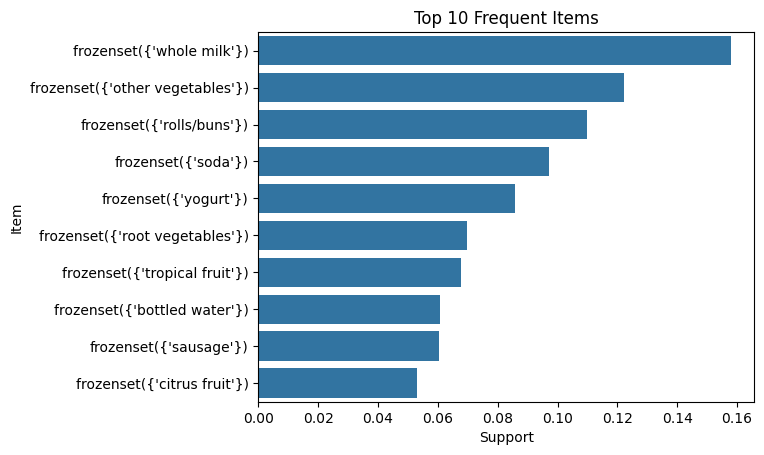

In [9]:
top_items = frequent_items.sort_values('support', ascending=False).head(10)
sns.barplot(x='support', y=top_items['itemsets'].astype(str), data=top_items)
plt.title('Top 10 Frequent Items')
plt.xlabel('Support')
plt.ylabel('Item')
plt.show()


# Scatterplot of support vs confidence
This scatterplot will help us see the quality and distribution of all your rules at a glance, even if we have weak rules.

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:114: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


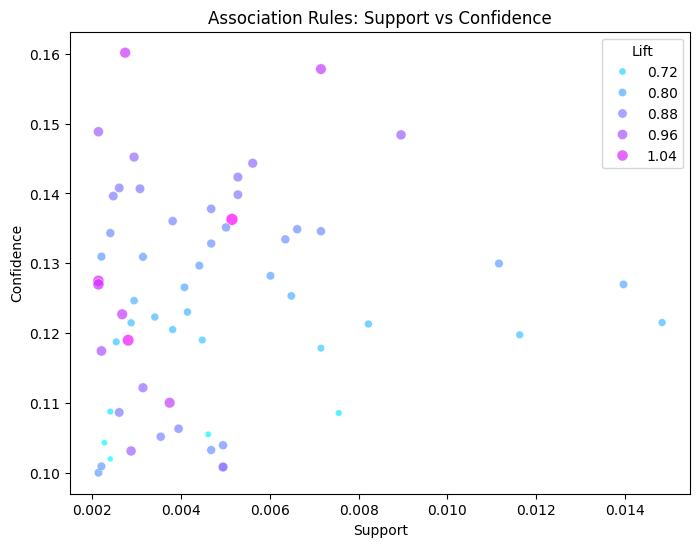

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='cool', alpha=0.7)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

# Conclusion
The Market Basket Analysis revealed that while certain grocery items such as dairy products, fruits & vegetables are frequent purchases, there are limited strong associations between products.
This suggests that customer baskets in this dataset are highly individualized rather than pattern-driven.
From a business perspective, this insight could indicate an opportunity to design promotions or combo offers to encourage consistent product pairings.